In [4]:
#Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Rectangle

In [5]:
#Load data.xlsx file, which contains the country names and SDG indicators
df_data = pd.read_excel('Historical and Predicted Indicator Data.xlsx')
arr_data = df_data.to_numpy()

#Store the country name, year range, and indicators into numpy arrays
country_names = df_data['Country Name'].to_numpy()
years = df_data['Year'].to_numpy()
indicator_1 = df_data['Life expectancy at birth, total (years)'].to_numpy()
indicator_2 = df_data['Agricultural land (% of land area)'].to_numpy()
indicator_3 = df_data['Population density (people per sq. km of land area)'].to_numpy()


Enter the country name to search for:  Canada


Canada is found in the country names.


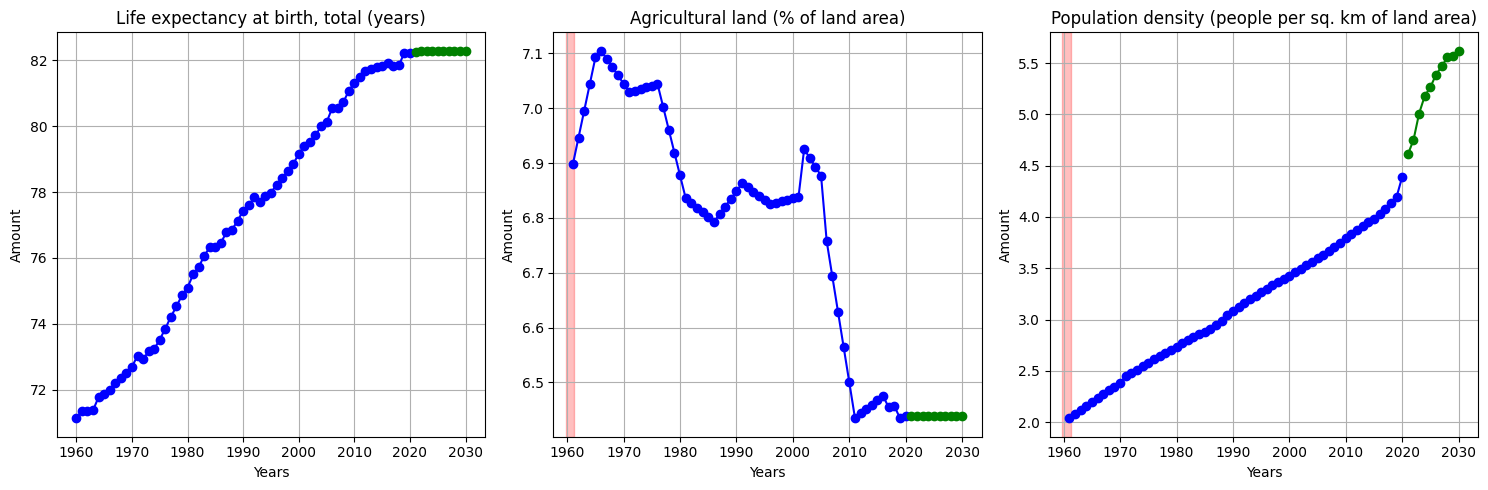

In [6]:
#Ask user input for the country name
user_input = input("Enter the country name to search for: ")

#Check if the user inputed country exists in the country names column
if user_input in country_names:
    print(f"{user_input} is found in the country names.")

    filtered_data = df_data[df_data['Country Name'] == user_input]

    #Extract the filtered data for the chosen country
    years_filtered = filtered_data['Year'].to_numpy()
    indicator_1_filtered = filtered_data['Life expectancy at birth, total (years)'].to_numpy()
    indicator_2_filtered = filtered_data['Agricultural land (% of land area)'].to_numpy()
    indicator_3_filtered = filtered_data['Population density (people per sq. km of land area)'].to_numpy()
    
    #Create 3 plots side by side for each of the indicators, (1 row and 3 columns)
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    #This function draws a solid box for any periods of time with missing historial data (NaN)
    def draw_missing_data_box(ax, years, indicator_data, color='orange'):
        missing_data_indices = np.isnan(indicator_data)

        #Get current y-axis limits
        ymin, ymax = ax.get_ylim()

        #Identify range of NaN values
        start_idx = None
        for idx in range(len(indicator_data)):
            if missing_data_indices[idx]:
                if start_idx is None:
                    start_idx = idx 
            else:
                if start_idx is not None:
                    #Found the end of a NaN range, draw a rectangle for this range
                    ax.add_patch(Rectangle(
                        (years[start_idx] - 0.25, ymin),  #Start of NaN range, ymin (position of the box)
                        years[idx] - years[start_idx] + 0.5,  #Span of the NaN range (width of the box)
                        ymax - ymin,  #Full y-range (height of the box)
                        color='r',  #Colour of box
                        alpha=0.25  #Transparency of box
                    ))
                    start_idx = None  #Reset start_idx
                    
        #Case where the entire dataset is NaN
        if start_idx is not None:
            ax.add_patch(Rectangle(
                (years[start_idx] - 0.25, ymin),  #Start of NaN range, ymin (position of the box)
                years[-1] - years[start_idx] + 0.5,  #Span from start to the last year (width of the box)
                ymax - ymin,  #Full y-range (height of the box)
                color='r',  #Colour of the box
                alpha=0.25  #Transparency of the box
            ))

    #This function plots historical and predicted data points
    def plot_with_colored_points(ax, years, indicator_data, title):
        
        #Splits the data into historical and predicted
        historical_idx = years <= 2020
        predicted_idx = years > 2020

        #Plot historical data (before 2020)
        ax.plot(years[historical_idx], indicator_data[historical_idx], color='b', marker='o', linestyle='-', label='Historical')

        #Plot predicted data (after 2020)
        ax.plot(years[predicted_idx], indicator_data[predicted_idx], color='g', marker='o', linestyle='-', label='Predicted')

        #Title, labels, and grid
        ax.set_title(title)
        ax.set_xlabel('Years')
        ax.set_ylabel('Amount')
        ax.grid()

    #Plot 1: Indicator 1 (Life expectancy)
    plot_with_colored_points(axs[0], years_filtered, indicator_1_filtered, 'Life expectancy at birth, total (years)')
    draw_missing_data_box(axs[0], years_filtered, indicator_1_filtered)

    #Plot 2: Indicator 2 (Agricultural land)
    plot_with_colored_points(axs[1], years_filtered, indicator_2_filtered, 'Agricultural land (% of land area)')
    draw_missing_data_box(axs[1], years_filtered, indicator_2_filtered)

    #Plot 3: Indicator 3 (Population density)
    plot_with_colored_points(axs[2], years_filtered, indicator_3_filtered, 'Population density (people per sq. km of land area)')
    draw_missing_data_box(axs[2], years_filtered, indicator_3_filtered)

    #Adjusting layout to prevent overlap
    plt.tight_layout()
    
    #Show plots
    plt.show()

#Print error message if inputed country name is not found
else:
    print(f"{user_input} is not found in the country names. Please try again")
